In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import stats

In [55]:
waves = pd.read_csv('data/reanalysis-era5-single-levels-timeseries-WaveP2.csv', parse_dates = True, index_col = 0, names=['date_&_time', 
                            'mean_wave_direction_(deg_N)',
                            'mean_wave_period_(s)',
                            'significant_wave_height_(m)',
                            'latitude',
                            'longitude'] , skiprows=1) 
display(waves)

,mean_wave_direction_(deg_N),mean_wave_period_(s),significant_wave_height_(m),latitude,longitude
date_&_time,,,,,
1940-01-01 00:00:00,308.697800,2.484964,0.280483,44.5,12.5
1940-01-01 01:00:00,309.649570,2.566502,0.277106,44.5,12.5
1940-01-01 02:00:00,310.111270,2.603852,0.268004,44.5,12.5
1940-01-01 03:00:00,311.775180,2.615621,0.263845,44.5,12.5
1940-01-01 04:00:00,314.782260,2.620293,0.259005,44.5,12.5
...,...,...,...,...,...
2024-04-30 19:00:00,74.443120,1.947217,0.133622,44.5,12.5
2024-04-30 20:00:00,89.669650,2.023138,0.141413,44.5,12.5
2024-04-30 21:00:00,103.551285,2.067456,0.149424,44.5,12.5


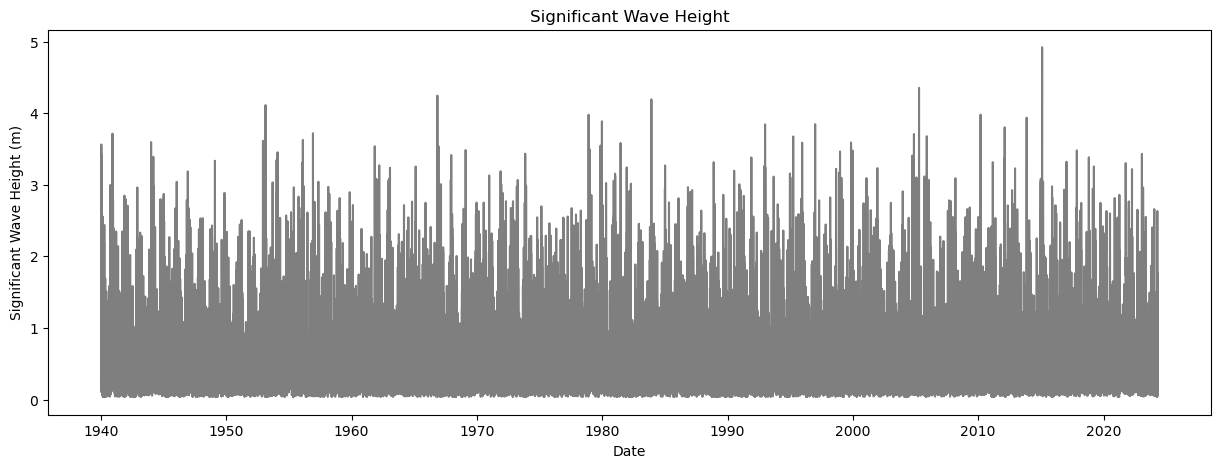

In [56]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(waves.index, waves['significant_wave_height_(m)'], label='significant wave height', color='k', alpha=0.5)
ax.set_title('Significant Wave Height')
ax.set_xlabel('Date')
ax.set_ylabel('Significant Wave Height (m)')
plt.show()
# # # # # 

In [57]:
mean = waves['significant_wave_height_(m)'].mean()
std = waves['significant_wave_height_(m)'].std()
skewness = waves['significant_wave_height_(m)'].skew()
kurtosis = waves['significant_wave_height_(m)'].kurtosis()

print(f"Mean: {mean}, Std: {std}, Skewness: {skewness}, Kurtosis: {kurtosis}")

print(waves.describe())

Mean: 0.4504203837197383, Std: 0.40805162481479573, Skewness: 2.557217558291107, Kurtosis: 8.92952240891723
       mean_wave_direction_(deg_N)  mean_wave_period_(s)  \
count                739248.000000         739248.000000   
mean                    122.751097              3.265745   
std                      89.353816              0.968121   
min                       0.000432              1.616072   
25%                      57.329515              2.520114   
50%                     106.401235              3.067097   
75%                     144.034500              3.836978   
max                     360.002040              8.878386   

       significant_wave_height_(m)  latitude  longitude  
count                739248.000000  739248.0   739248.0  
mean                      0.450420      44.5       12.5  
std                       0.408052       0.0        0.0  
min                       0.031843      44.5       12.5  
25%                       0.194766      44.5       12.5  
50%

2.098181986


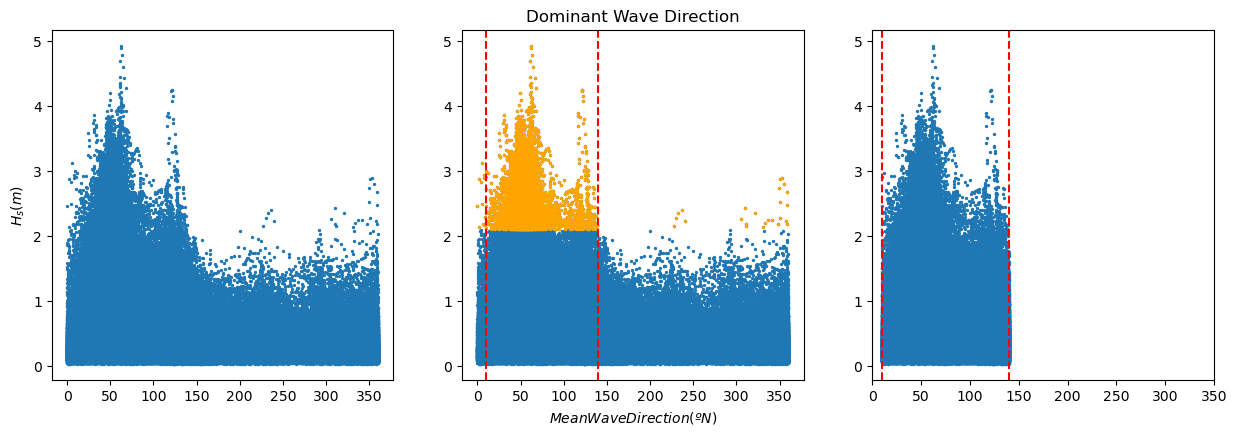

In [69]:
xlo = 10
xhi = 140

plt.figure(2, figsize = (15,10), facecolor='white')

plt.subplot(2,3,1)
plt.scatter(waves['mean_wave_direction_(deg_N)'], waves['significant_wave_height_(m)'], s = 2)
plt.ylabel('${H_s (m)}$')

print(waves['significant_wave_height_(m)'].quantile(0.99))
waves_99 = waves[waves['significant_wave_height_(m)']>=waves['significant_wave_height_(m)'].quantile(0.99)]

plt.subplot(2,3,2)
plt.title('Dominant Wave Direction')
plt.scatter(waves['mean_wave_direction_(deg_N)'], waves['significant_wave_height_(m)'], s = 2)
plt.scatter(waves_99['mean_wave_direction_(deg_N)'], waves_99['significant_wave_height_(m)'], color='orange', s = 2)
plt.axvline(x = xlo, color = 'r', linestyle = 'dashed')
plt.axvline(x = xhi, color = 'r', linestyle = 'dashed')
plt.xlabel('$Mean Wave Direction (ºN)$')

waves_angle = waves[(waves['mean_wave_direction_(deg_N)'].between(xlo, xhi))]

plt.subplot(2,3,3)
plt.scatter(waves_angle['mean_wave_direction_(deg_N)'], waves_angle['significant_wave_height_(m)'], s = 2)
plt.axvline(x = xlo, color = 'r', linestyle = 'dashed')
plt.axvline(x = xhi, color = 'r', linestyle = 'dashed')
plt.xlim([0, 350])
plt.show()


C:\Users\TUDelftSID\AppData\Local\Temp\ipykernel_47108\4124643737.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  L[iL,jL] =  L0[jL]*np.tanh(2*np.pi*(Depth/(L[iL-1,jL])))
c:\Users\TUDelftSID\anaconda3\envs\CIEM4220_DDB\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


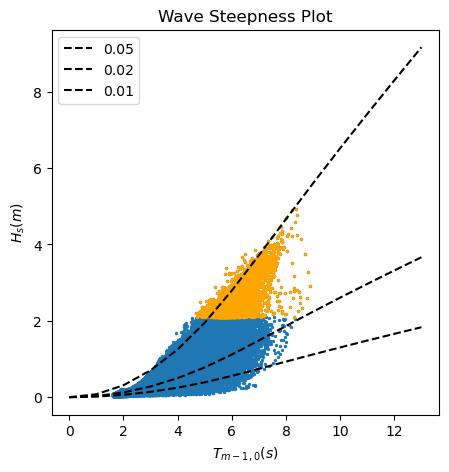

In [83]:
#Calculate theoretical wave steepness lines following the wave dispersion relationship.
N = 15
iterations = 20
Depth = 25
T_p = np.linspace(0,N,N+1)
L0 = 9.81*(T_p**2)/(2*np.pi) # Deep water wave length
L = np.zeros((iterations,len(T_p)))
L[0,:] = L0                # Initial guess for wave length = deep water wave length
L[0,0] = 0.1

# Calculate the wave periods using an iterative approach
for iL in np.arange(1,(len(L[:,0]))):
    for jL in np.arange(0,len(T_p)):
        L[iL,jL] =  L0[jL]*np.tanh(2*np.pi*(Depth/(L[iL-1,jL])))

# Compute theoretical significant wave heights for different steepnesses
Hs005 = L[-1,:]*0.05;
Hs002 = L[-1,:]*0.02;
Hs001 = L[-1,:]*0.01;

plt.figure(3, figsize = (5,5), facecolor='white')
plt.scatter(waves['mean_wave_period_(s)'], waves['significant_wave_height_(m)'], s = 2)
plt.scatter(waves_99['mean_wave_period_(s)'], waves_99['significant_wave_height_(m)'], color='orange', s = 2)
plt.plot(T_p[:-2], Hs005[:-2], linestyle = 'dashed', color = 'black', label = 0.05)
plt.plot(T_p[:-2], Hs002[:-2], linestyle = 'dashed', color = 'black', label = 0.02)
plt.plot(T_p[:-2], Hs001[:-2], linestyle = 'dashed', color = 'black', label = 0.01)
plt.xlabel('${T_{m-1,0} (s)}$')
plt.ylabel('${H_s (m)}$')
plt.title('Wave Steepness Plot')
plt.legend()
plt.show()


8.775050397248902


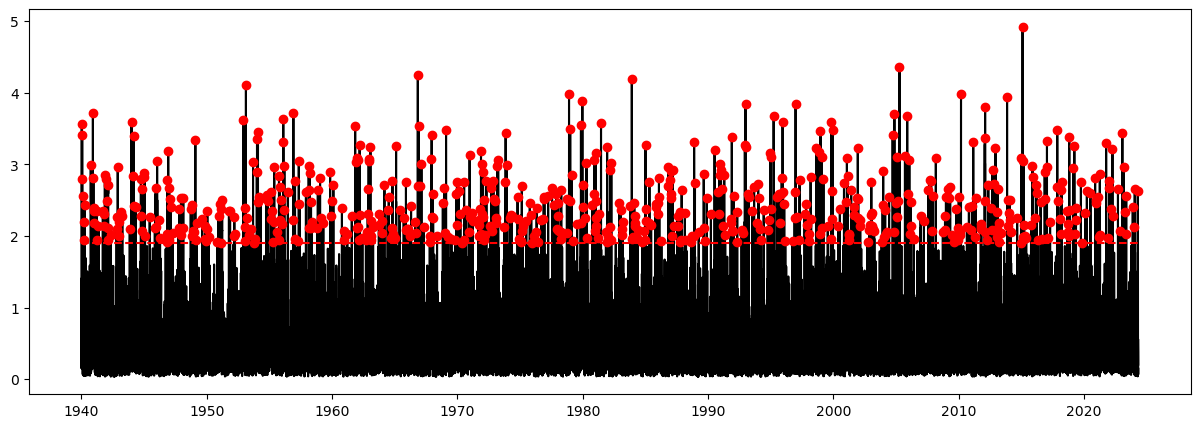

In [81]:
th = 1.9
d = 4 * 24 # hours
nyears = 84.33
Ns = len(peaklist) / (nyears)
print(Ns)

peaks, _ = find_peaks(waves_angle['significant_wave_height_(m)'], height=th, distance=d)
peaklist = waves_angle.iloc[peaks]

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(waves_angle.index, waves_angle['significant_wave_height_(m)'],'k', label='significant wave height')
ax.plot(peaklist.index, peaklist['significant_wave_height_(m)'], 'ro', label='peaks')
ax.hlines(th, waves_angle.index[0], waves_angle.index[-1], color='r', linestyle='--', label='threshold')

plt.show()

C:\Users\TUDelftSID\AppData\Local\Temp\ipykernel_47108\1386127529.py:18: RuntimeWarning: divide by zero encountered in divide
  rtp_par = 1 / ((1-cdf_par) * Ns)


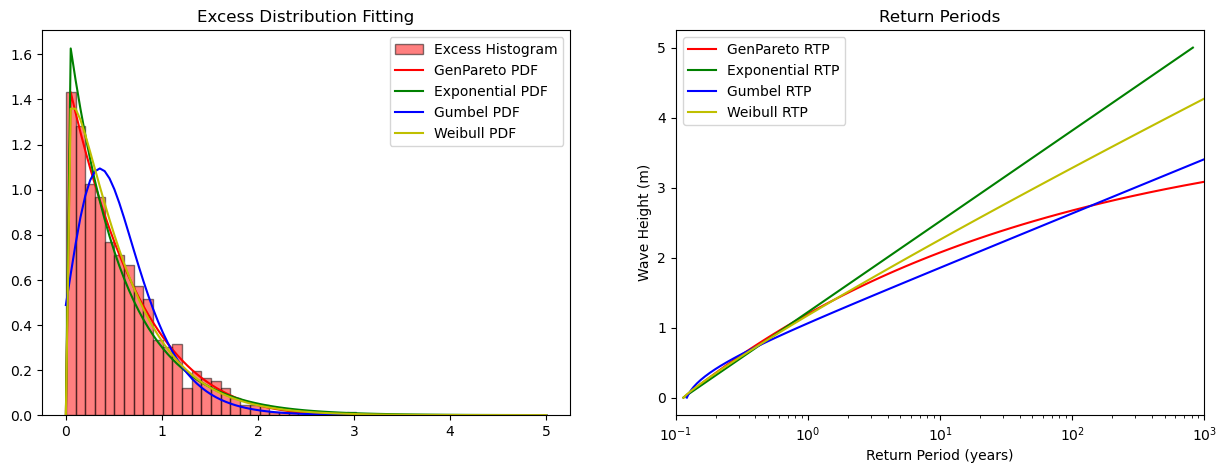

In [ ]:
excess = peaklist['significant_wave_height_(m)'].values - th
params_par = stats.genpareto.fit(excess)
params_exp = stats.expon.fit(excess)
params_gum = stats.gumbel_r.fit(excess)
params_wei = stats.weibull_min.fit(excess)

x = np.linspace(0, 5, 100)
pdf_par = stats.genpareto.pdf(x, *params_par)
pdf_exp = stats.expon.pdf(x, *params_exp)
pdf_gum = stats.gumbel_r.pdf(x, *params_gum)
pdf_wei = stats.weibull_min.pdf(x, *params_wei)

cdf_par = stats.genpareto.cdf(x, *params_par)
cdf_exp = stats.expon.cdf(x, *params_exp)
cdf_gum = stats.gumbel_r.cdf(x, *params_gum)
cdf_wei = stats.weibull_min.cdf(x, *params_wei)

rtp_par = 1 / ((1-cdf_par) * Ns)
rtp_exp = 1 / ((1-cdf_exp) * Ns)
rtp_gum = 1 / ((1-cdf_gum) * Ns)
rtp_wei = 1 / ((1-cdf_wei) * Ns)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(excess, bins=30, density=True, alpha=0.5, color='r', label='Excess Histogram', edgecolor='black')
ax[0].plot(x, pdf_par, 'r-', label='GenPareto PDF')
ax[0].plot(x, pdf_exp, 'g-', label='Exponential PDF')
ax[0].plot(x, pdf_gum, 'b-', label='Gumbel PDF')
ax[0].plot(x, pdf_wei, 'y-', label='Weibull PDF')
ax[0].set_title('Excess Distribution Fitting')
ax[0].legend()

ax[1].plot(rtp_par, x, 'r-', label='GenPareto RTP')
ax[1].plot(rtp_exp, x, 'g-', label='Exponential RTP')
ax[1].plot(rtp_gum, x, 'b-', label='Gumbel RTP')
ax[1].plot(rtp_wei, x, 'y-', label='Weibull RTP')
ax[1].set_title('Return Periods')
ax[1].set_ylabel('Wave Height (m)')
ax[1].set_xlabel('Return Period (years)')
ax[1].set_xscale('log')
ax[1].legend()
ax[1].set_xlim([0.1, 1000])



plt.show()